## M161 first question notebook
    - created venv python environment
    - shloud create requirements for resusability
    - data .csv files to large to upload to github will resolve thaht later
## Data cleaning I
 1.  check types 
 2. check for null values


In [2]:
import pandas as pd
file_path = 'bigdata2025classification/train.csv'

def load_and_process_data(file_path):
    # Load data from a CSV file
    dataTrain = pd.read_csv(file_path)

    print("Data loaded successfully.")
    print("First 5 rows of the dataset:")
    print(dataTrain.head())

    print("\nData summary:")
    print(dataTrain.info())

    # Check for missing values in the dataframe
    print("\nMissing values in each column:")
    print(dataTrain.isnull().sum())
    
    return dataTrain

dataTrain = load_and_process_data(file_path)

# check column data types
def check_column_types(dataTrain):
    print("\nColumn data types:")
    print(dataTrain.dtypes)

check_column_types(dataTrain)





Data loaded successfully.
First 5 rows of the dataset:
       Id                                              Title  \
0  227464  Netflix is coming to cable boxes, and Amazon i...   
1  244074  Pharrell, Iranian President React to Tehran 'H...   
2   60707                    Wildlife service seeks comments   
3   27883  Facebook teams up with Storyful to launch 'FB ...   
4  169596           Caesars plans US$880 mln New York casino   

                                             Content          Label  
0   if you subscribe to one of three rinky-dink (...  Entertainment  
1   pharrell, iranian president react to tehran '...  Entertainment  
2   the u.s. fish and wildlife service has reopen...     Technology  
3   the very nature of social media means it is o...     Technology  
4   caesars plans us$880 mln new york casino jul ...       Business  

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111795 entries, 0 to 111794
Data columns (total 4 columns):
 #   Column   N

## Data cleaning II continue
3. check for duplicates
***************************
### note
- the data types of all exeprt Id column is "object" in pandas, it works, but could be converted to String for a performance uplift.
*****************************

In [3]:
# Check for duplicate rows in the dataframe
def check_duplicates(dataTrain):
    duplicate_count = dataTrain.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_count}")
    return duplicate_count

check_duplicates(dataTrain)

# Check for duplicates based only on 'Title' column
def check_title_duplicates(dataTrain):
    if 'Title' in dataTrain.columns:
        dup_count = dataTrain.duplicated(subset=['Title']).sum()
        print(f"\nNumber of duplicate rows based on Title: {dup_count}")
        return dup_count
    else:
        print("'Title' column not found in the dataframe.")
        return None

check_title_duplicates(dataTrain)

# Check for duplicates based only on 'Content' column
def check_content_duplicates(dataTrain):
    if 'Content' in dataTrain.columns:
        dup_count = dataTrain.duplicated(subset=['Content']).sum()
        print(f"\nNumber of duplicate rows based on Content: {dup_count}")
        return dup_count
    else:
        print("'Content' column not found in the dataframe.")
        return None

check_content_duplicates(dataTrain)
# Check for duplicates based on 'Title' and 'Content' columns
def check_title_content_duplicates(dataTrain):
    if 'Title' in dataTrain.columns and 'Content' in dataTrain.columns:
        dup_count = dataTrain.duplicated(subset=['Title', 'Content']).sum()
        print(f"\nNumber of duplicate rows based on Title and Content: {dup_count}")
        return dup_count
    else:
        print("'Title' and/or 'Content' columns not found in the dataframe.")
        return None

check_title_content_duplicates(dataTrain)


Number of duplicate rows: 0

Number of duplicate rows based on Title: 1161

Number of duplicate rows based on Content: 1811

Number of duplicate rows based on Title and Content: 575


np.int64(575)

## Regarding word clouds
- specifically asks  to use **ALL DATA** in each category, so without removing the duplicates it does not make so much sense though.

**Switched to "Raw" the cell mode to avoid repeated execution which takes time during development**
**************************

In [4]:
# Remove duplicates based on 'Title' and 'Content' columns, keeping the first occurrence
dataTrain = dataTrain.drop_duplicates(subset=['Title', 'Content'], keep='first')
print("\nDuplicates based on Title and Content removed. Data shape:", dataTrain.shape)


# Reset the index after removing duplicates
dataTrain = dataTrain.reset_index(drop=True)
print("\nIndex reset. Data shape:", dataTrain.shape)
dataTrain.info()


Duplicates based on Title and Content removed. Data shape: (111220, 4)

Index reset. Data shape: (111220, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111220 entries, 0 to 111219
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Id       111220 non-null  int64 
 1   Title    111220 non-null  object
 2   Content  111220 non-null  object
 3   Label    111220 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


***************
 Bellow sentence_cound always return 1 because i have removed stopword in cell 5 above, can move the cell above to get a real metric 

### **fixed**
*******************

In [5]:
import numpy as np
dataTrain['text_length'] = dataTrain['Content'].apply(len)
dataTrain['word_count'] = dataTrain['Content'].apply(lambda x: len(str(x).split()))
dataTrain['sentence_count'] = dataTrain['Content'].apply(lambda x: len(str(x).split('.')))
dataTrain['avg_word_length'] = dataTrain['Content'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

print("\n--- Content Statistics ---")
print(dataTrain[['text_length', 'word_count', 'sentence_count', 'avg_word_length']].describe())


--- Content Statistics ---
         text_length     word_count  sentence_count  avg_word_length
count  111220.000000  111220.000000   111220.000000    111220.000000
mean     2540.216274     419.385021       24.366472         5.063333
std      2100.902069     348.882298       22.829029         0.447430
min        16.000000       3.000000        1.000000         2.500000
25%      1297.000000     216.000000       12.000000         4.831776
50%      2022.000000     335.000000       19.000000         5.051411
75%      3135.000000     514.000000       30.000000         5.266425
max     78614.000000   12562.000000     1343.000000        95.820513


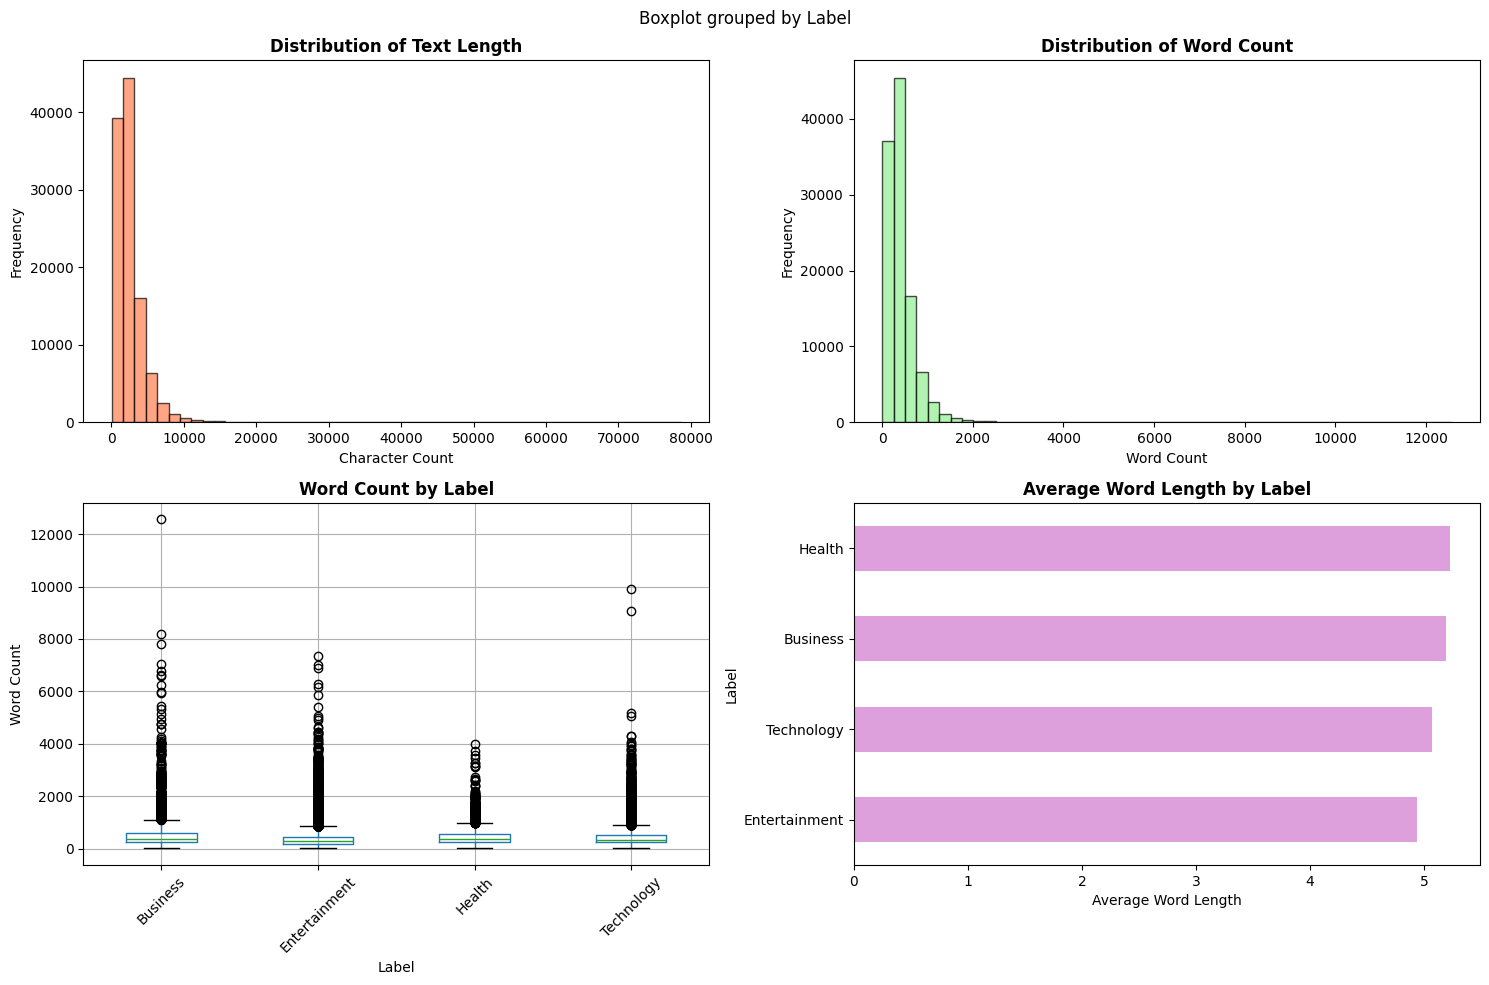

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Text length distribution
axes[0, 0].hist(dataTrain['text_length'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Text Length', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')

# Word count distribution
axes[0, 1].hist(dataTrain['word_count'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Word Count', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')

# Box plot: Word count by category
dataTrain.boxplot(column='word_count', by='Label', ax=axes[1, 0])
axes[1, 0].set_title('Word Count by Label', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Label')
axes[1, 0].set_ylabel('Word Count')
plt.sca(axes[1, 0])
plt.xticks(rotation=45)
# Avg word length by category
category_avg_word_length = dataTrain.groupby('Label')['avg_word_length'].mean().sort_values()
category_avg_word_length.plot(kind='barh', ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Average Word Length by Label', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Average Word Length')
axes[1, 1].set_ylabel('Label')

plt.tight_layout()
plt.show()

Label
Entertainment    44527
Technology       29998
Business         24742
Health           11953
Name: count, dtype: int64

Number of unique Labels: 4


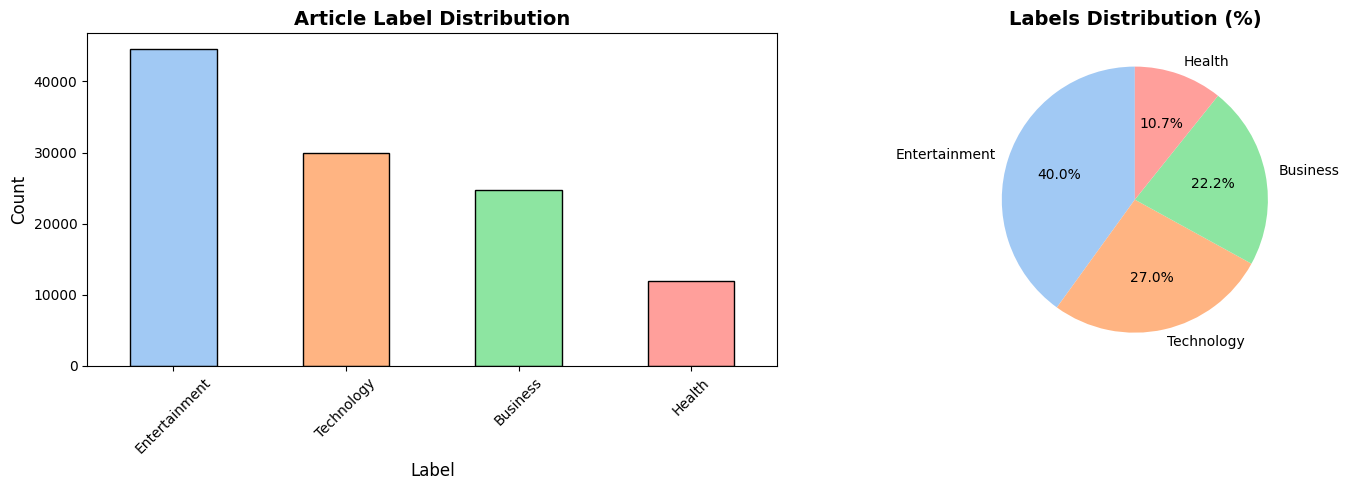

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
category_counts = dataTrain['Label'].value_counts()

print(category_counts)
print(f"\nNumber of unique Labels: {dataTrain['Label'].nunique()}")

# Get a color palette with as many colors as there are categories
palette = sns.color_palette('pastel', n_colors=len(category_counts))

# Bar plot with consistent colors
category_counts.plot(kind='bar', ax=axes[0], color=palette, edgecolor='black')
axes[0].set_title('Article Label Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Pie chart with the same colors
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
            startangle=90, colors=palette)
axes[1].set_title('Labels Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### Remove words not in English dictionary

- **probably could change dictionary for better results but it works...**


In [8]:
import re
import nltk
from nltk.corpus import words

# Download the words corpus if not already present
nltk.download('words')
english_words = set(words.words())

def clean_text(text):
    # Split text into words
    word_list = re.findall(r'\b\w+\b', str(text))
    cleaned_words = []
    for word in word_list:
        # Drop any word not in dictionary
        if word.lower() not in english_words:
            continue
        # Drop words with 2+ repeating chars not in dictionary (redundant now, but kept for clarity)
        if re.search(r'(.)\1{1,}', word):
            if word.lower() not in english_words:
                continue
        cleaned_words.append(word)
    return ' '.join(cleaned_words)

# Apply to both columns
dataTrain['Title'] = dataTrain['Title'].apply(clean_text)
dataTrain['Content'] = dataTrain['Content'].apply(clean_text)


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\odys_\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


**NOTE**
- TAKES A LOT OF TIME TO EXECUTE ~7 min
*********************

In [9]:
import re
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download required NLTK data if not already present
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_text(text):
    # Expand contractions
    text = contractions.fix(text)
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (keep only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    words = text.split()
    # Remove stopwords, lemmatize, and stem
    words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words if word not in stop_words]
    text = ' '.join(words)
    return text

for col in ['Title', 'Content']:
    dataTrain[col] = dataTrain[col].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\odys_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\odys_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\odys_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
print(dataTrain.head())

       Id                       Title  \
0  227464  come cabl groceri overlord   
1  244074          presid react happi   
2   60707              wildlif servic   
3   27883                      launch   
4  169596           u new york casino   

                                             Content          Label  \
0  subscrib one three dink compar speak cabl abl ...  Entertainment   
1  presid react happi singer presid took twitter ...  Entertainment   
2  fish wildlif servic comment period addit day p...     Technology   
3  natur social medium often sourc real time brea...     Technology   
4  u new york casino latest news top deck world e...       Business   

   text_length  word_count  sentence_count  avg_word_length  
0         1576         264              15         4.965909  
1         1200         192              10         5.250000  
2         2773         416              34         5.665865  
3         1564         254              13         5.157480  
4         2250  

## Starting future extraction (converting text to numbers for ML algorythms to run)
- we should use Bag of words based on project requirements 
- Shoud take into account the title column in combination with content ()

### ℹ️info 

- countvetrorizer does convert everyting to lowecase and removes punctuation by default. could remove steps from above Nltk powered code cell
- Title and Content column are combined in to a sing string and then tokenized and vectorized

In [11]:
# Combine 'Title' and 'Content' columns into a single string
# and vectorize the result for classification
from sklearn.feature_extraction.text import CountVectorizer

# Create a new column that combines Title and Content
# (if either column is missing, fill with empty string)
dataTrain['Combined'] = dataTrain['Title'].fillna('') + ' ' + dataTrain['Content'].fillna('')

# Initialize CountVectorizer (Bag of Words)
bow_vectorizer = CountVectorizer()

# Fit and transform the combined column
dataTrain_bow = bow_vectorizer.fit_transform(dataTrain['Combined'])

# Show shape and a sample
print('Bag of Words matrix shape:', dataTrain_bow.shape)
print("dataTrain_bow sample (first 10 rows):", dataTrain_bow[:10].toarray())
print('Feature names (first 20):', bow_vectorizer.get_feature_names_out()[:20])

Bag of Words matrix shape: (111220, 27139)
dataTrain_bow sample (first 10 rows): [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature names (first 20): ['aa' 'aal' 'aam' 'aardvark' 'aba' 'abaca' 'aback' 'abacu' 'abalon'
 'abandon' 'abas' 'abash' 'abat' 'abattoir' 'abb' 'abba' 'abbasi' 'abbey'
 'abbot' 'abbrevi']


In [12]:
print('Feature names (first 100):', bow_vectorizer.get_feature_names_out()[:1000])

Feature names (first 100): ['aa' 'aal' 'aam' 'aardvark' 'aba' 'abaca' 'aback' 'abacu' 'abalon'
 'abandon' 'abas' 'abash' 'abat' 'abattoir' 'abb' 'abba' 'abbasi' 'abbey'
 'abbot' 'abbrevi' 'abdic' 'abdomen' 'abdomin' 'abduct' 'abductor' 'abe'
 'abeam' 'abel' 'aberr' 'abet' 'abey' 'abhor' 'abhorr' 'abi' 'abid'
 'abidi' 'abigail' 'abil' 'abiot' 'abir' 'abject' 'abl' 'ablat' 'ablaz'
 'abli' 'ablow' 'ablut' 'abneg' 'abnorm' 'aboard' 'abod' 'abolish'
 'abolit' 'abolitionist' 'abomin' 'aborigin' 'abort' 'abortionist'
 'abound' 'about' 'aboveboard' 'aboveground' 'abracadabra' 'abras'
 'abrash' 'abreast' 'abridg' 'abroad' 'abrog' 'abrupt' 'abruptli'
 'abscess' 'abscond' 'absenc' 'absent' 'absente' 'absentmindedli'
 'absinth' 'absolut' 'absolutist' 'absolv' 'absorb' 'absorbingli'
 'absorpt' 'absquatul' 'abstain' 'abstent' 'abstin' 'abstract'
 'abstractli' 'abstrus' 'absurd' 'absurdli' 'abu' 'abund' 'abundantli'
 'abus' 'abut' 'abuzz' 'abysm' 'abyss' 'academ' 'academi' 'academician'
 'acapulco' '

## need to clean the above reparing letter words
- assignment does not require it for the forst SVM and KNN (jaccard distance) models. This will be used as 

In [13]:
# # Dimensionality reduction using Truncated SVD (LSA) for text data
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD

# # Example: Use the 'Content' column for text features and 'Label' as target
# if 'Content' in dataTrain.columns and 'Label' in dataTrain.columns:
#     # Convert text to TF-IDF features
#     vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
#     X_tfidf = vectorizer.fit_transform(dataTrain['Content'].fillna(''))
    
#     # Apply Truncated SVD
#     svd = TruncatedSVD(n_components=100, random_state=42)
#     X_reduced = svd.fit_transform(X_tfidf)
    
#     print('Original TF-IDF shape:', X_tfidf.shape)
#     print('Reduced shape after Truncated SVD:', X_reduced.shape)
# else:
#     print("'Content' and/or 'Label' columns not found in the dataframe.")

## ~ 25 min execution time, accuracy ~94,4% mean 5 fold cross validation 

In [14]:
# SVM classification with 5-fold cross-validation on Bag of Words features
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import numpy as np

# X: Bag of Words features, y: labels
X = dataTrain_bow

# Ensure 'Label' column exists and has no missing values
y = dataTrain['Label'].values

# Initialize Linear SVM classifier (much faster for large datasets)
svm_clf = LinearSVC(random_state=42, max_iter=10000)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_clf, X, y, cv=5, scoring='accuracy')

print('LinearSVC 5-fold CV accuracy scores:', cv_scores)
print('Mean CV accuracy:', np.mean(cv_scores))

LinearSVC 5-fold CV accuracy scores: [0.94461428 0.94232152 0.94470419 0.94555835 0.94376012]
Mean CV accuracy: 0.9441916921417011


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Fit the classifier before predicting if not already fitted
if not hasattr(svm_clf, 'classes_'):
    svm_clf.fit(X, y)

y_pred = svm_clf.predict(X)

# Print accuracy by class
print("Classification Report (Accuracy by Class):")
print(classification_report(y, y_pred, target_names=None))

# Print confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

# Optionally, display confusion matrix as a DataFrame for better readability
cm_df = pd.DataFrame(cm)
display(cm_df)

Classification Report (Accuracy by Class):
               precision    recall  f1-score   support

     Business       0.99      0.99      0.99     24742
Entertainment       1.00      1.00      1.00     44527
       Health       1.00      1.00      1.00     11953
   Technology       0.99      0.99      0.99     29998

     accuracy                           1.00    111220
    macro avg       1.00      1.00      1.00    111220
 weighted avg       1.00      1.00      1.00    111220

Confusion Matrix:
[[24536    11     2   193]
 [   25 44495     0     7]
 [   18     2 11930     3]
 [  227     6     1 29764]]


,0,1,2,3
0,24536,11,2,193
1,25,44495,0,7
2,18,2,11930,3
3,227,6,1,29764
